In [15]:
import pandas as pd
import zipfile39 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")



Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the 
presence of Salmo trutta fario (Brown Trout).

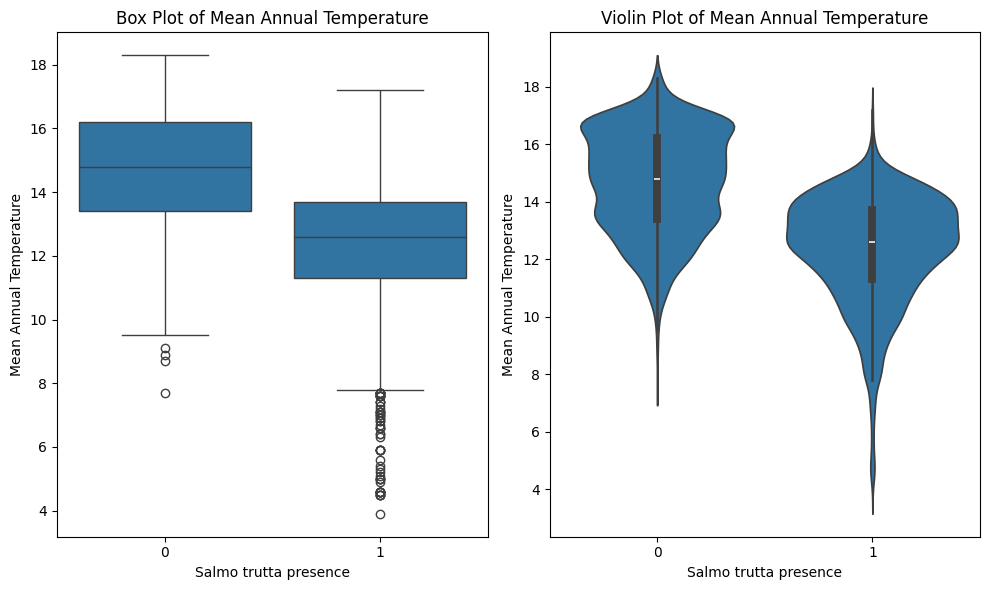

In [10]:
plt.figure(figsize=(10, 6))

# Create a box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.boxplot(x='Salmo trutta fario', y='temp_ann', data=df)
plt.xlabel('Salmo trutta presence')  # Label x-axis
plt.ylabel('Mean Annual Temperature')  # Label y-axis
plt.title('Box Plot of Mean Annual Temperature')

# Create a violin plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.violinplot(x='Salmo trutta fario', y='temp_ann', data=df)
plt.xlabel('Salmo trutta presence')  # Label x-axis
plt.ylabel('Mean Annual Temperature')  # Label y-axis
plt.title('Violin Plot of Mean Annual Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

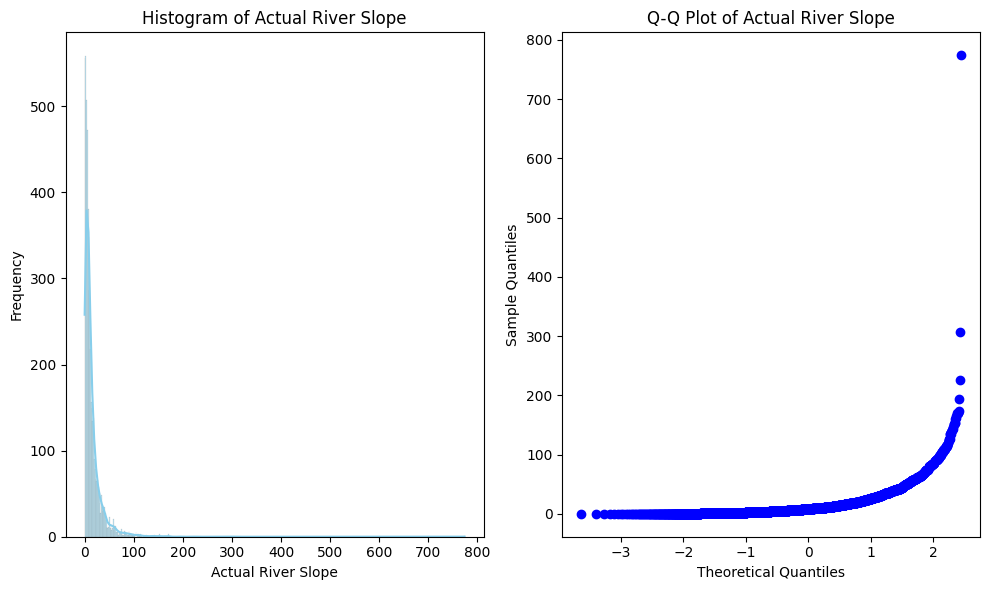

Shapiro-Wilk Test:
Test Statistic: nan
p-value: 1.0

Kolmogorov-Smirnov Test:
Test Statistic: nan
p-value: nan


C:\Users\marti\AppData\Local\Temp\ipykernel_12496\2385322419.py:44: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5011.
  shapiro_test_stat, shapiro_p_value = stats.shapiro(df['Actual_river_slope'])


In [28]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import the data
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Drop missing or non-numeric values from the column of interest
#filtered_data = df['Actual_river_slope'].dropna().astype(float)

#drop the missing values
filtered_data = df['Actual_river_slope'].dropna()
filtered_data = filtered_data.dropna()
#convert it to a numeric data type
#df['Actual_river_slope'] = pd.to_numeric(df['Actual_river_slope'], errors='coerce')
#



# Visualize the distribution
plt.figure(figsize=(10, 6))

# Histogram

plt.subplot(1, 2, 1)
sns.histplot(df['Actual_river_slope'], kde=True, color='skyblue')
plt.title('Histogram of Actual River Slope')
plt.xlabel('Actual River Slope')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Actual_river_slope'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Actual River Slope')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(df['Actual_river_slope'])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_stat)
print("p-value:", shapiro_p_value)

# Perform Kolmogorov-Smirnov test for normality
ks_test_stat, ks_p_value = stats.kstest(df['Actual_river_slope'], 'norm')
print("\nKolmogorov-Smirnov Test:")
print("Test Statistic:", ks_test_stat)
print("p-value:", ks_p_value)


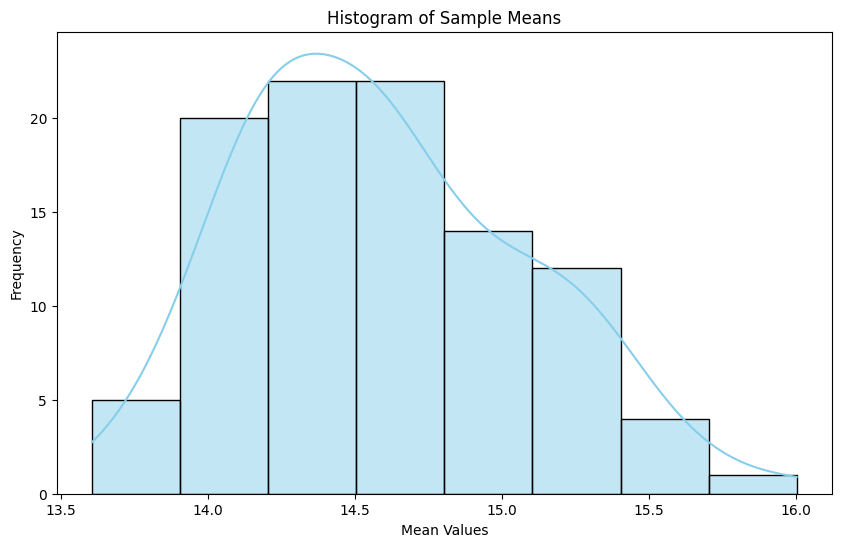

Shapiro-Wilk Test:
Test Statistic: 0.9757253684291135
p-value: 0.061497250902592795

Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import the data
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Number of samples and observations per sample
num_samples = 100
sample_size = 2000

# Initialize an array to store the mean values
sample_means = np.zeros(num_samples)

# Generate 100 samples and compute the mean for each sample
for i in range(num_samples):
    sample = df['Actual_river_slope'].sample(n=sample_size, replace=True)
    sample_means[i] = sample.mean()

# Plot the histogram of mean values
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='skyblue')
plt.title('Histogram of Sample Means')
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(sample_means)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_stat)
print("p-value:", shapiro_p_value)

# Perform Kolmogorov-Smirnov test for normality
ks_test_stat, ks_p_value = stats.kstest(sample_means, 'norm')
print("\nKolmogorov-Smirnov Test:")
print("Test Statistic:", ks_test_stat)
print("p-value:", ks_p_value)
